In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
!pip install pycaret
print("Pycaret installed sucessfully!!")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 79.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 55.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 9.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - \ | / done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 40.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 61.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.7/484.7 kB 22.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 55.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 55.5 

In [3]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt

In [4]:
iris12=load_iris()
data=iris12.data

In [5]:
subcluster_sizes = [3,4,5]

In [6]:
clustering_algorithms = {
    'KMeans': KMeans,
    'AgglomerativeClustering': AgglomerativeClustering,
    'DBSCAN': DBSCAN
}

In [7]:
results_dict = {algorithm_name: [] for algorithm_name in clustering_algorithms.keys()}

In [8]:
for algorithm_name, algorithm in clustering_algorithms.items():
    # Loop through different data processing methods
    for processing_method in ['No Data Processing', 'Normalization', 'Transformation', 'PCA', 'T+N', 'T+N+PCA']:
        for subcluster_size in subcluster_sizes:
            # Apply data processing based on the method
            processed_data = data.copy()  # Assume no processing by default
            if processing_method == 'Normalization':
                scaler = MinMaxScaler()
                processed_data = scaler.fit_transform(data)
            elif processing_method == 'Transformation':
                scaler = StandardScaler()
                processed_data = scaler.fit_transform(data)
            elif processing_method == 'PCA':
                pca = PCA(n_components=min(subcluster_size, data.shape[1]))
                processed_data = pca.fit_transform(data)
            elif processing_method == 'T+N':
                scaler = MinMaxScaler()
                transformed_data = scaler.fit_transform(data)
                processed_data = transformed_data
            elif processing_method == 'T+N+PCA':
                scaler = MinMaxScaler()
                transformed_data = scaler.fit_transform(data)
                pca = PCA(n_components=min(subcluster_size, data.shape[1]))
                processed_data = pca.fit_transform(transformed_data)
            
            # Perform clustering
            if algorithm_name == 'DBSCAN':
                clusters = algorithm(eps=0.5, min_samples=5).fit_predict(processed_data)
            else:
                clusters = algorithm(n_clusters=subcluster_size).fit_predict(processed_data)
            
            # Check if clustering generated valid clusters
            unique_labels = len(set(clusters))
            if unique_labels > 1:
                # Calculate evaluation metrics
                silhouette = silhouette_score(processed_data, clusters)
                calinski_harabasz = calinski_harabasz_score(processed_data, clusters)
                davies_bouldin = davies_bouldin_score(processed_data, clusters)
                
                # Append results to the list
                results_dict[algorithm_name].append({
                    'Algorithm': algorithm_name,
                    'Processing Method': processing_method,
                    'Subcluster Size': subcluster_size,
                    'Silhouette Score': silhouette,
                    'Calinski-Harabasz Score': calinski_harabasz,
                    'Davies-Bouldin Score': davies_bouldin
                })

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

In [9]:
dfs = {}
for algorithm_name, results in results_dict.items():
    dfs[algorithm_name] = pd.DataFrame(results)

# Print the results in a beautiful table format
for algorithm_name, df in dfs.items():
    print(f"Clustering Algorithm: {algorithm_name}\n")
    print(df.to_string(index=False))
   
    print("\n\n")

Clustering Algorithm: KMeans

Algorithm  Processing Method  Subcluster Size  Silhouette Score  Calinski-Harabasz Score  Davies-Bouldin Score
   KMeans No Data Processing                3          0.552819               561.627757              0.661972
   KMeans No Data Processing                4          0.498051               530.765808              0.780307
   KMeans No Data Processing                5          0.491240               495.369906              0.815989
   KMeans      Normalization                3          0.504769               359.845074              0.760277
   KMeans      Normalization                4          0.445065               314.472999              0.900449
   KMeans      Normalization                5          0.352571               289.505999              0.957021
   KMeans     Transformation                3          0.459948               241.904402              0.833595
   KMeans     Transformation                4          0.386941               207.

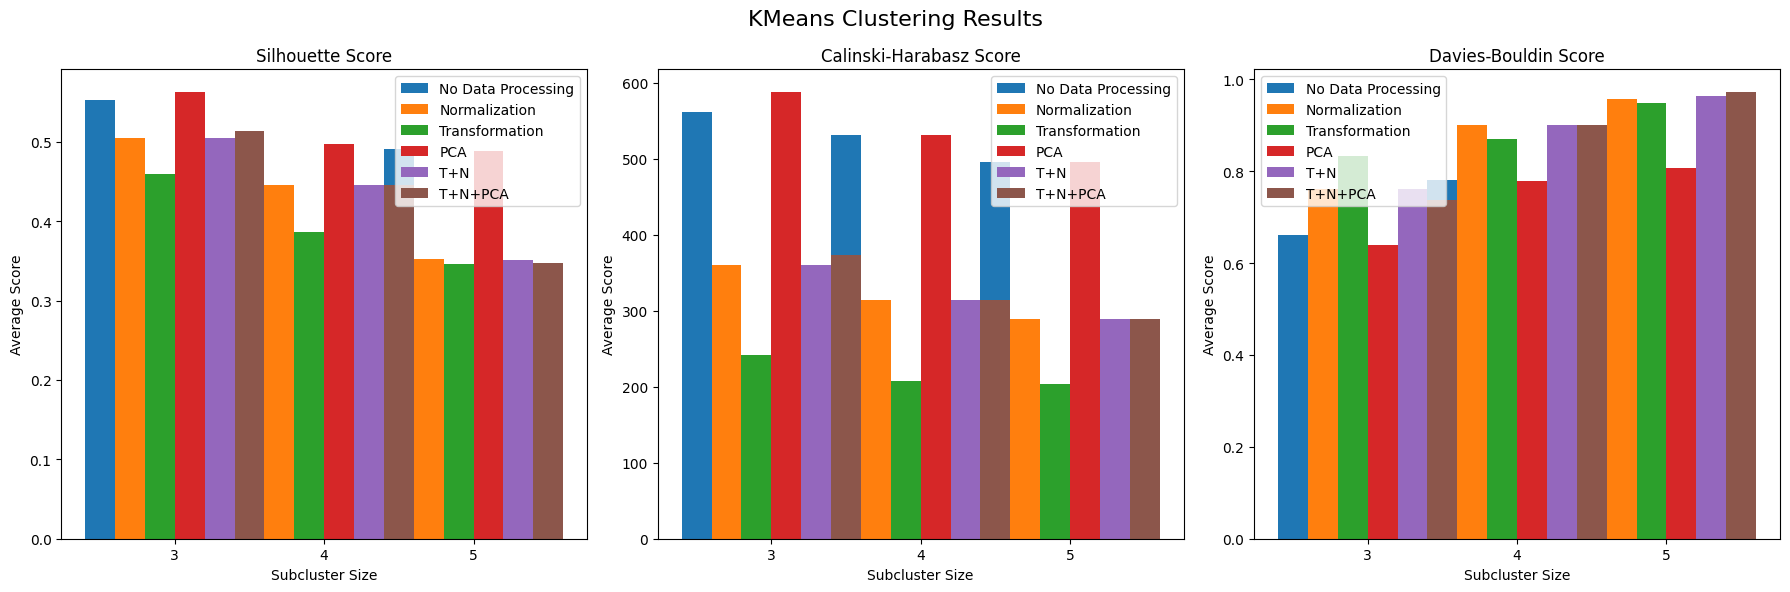

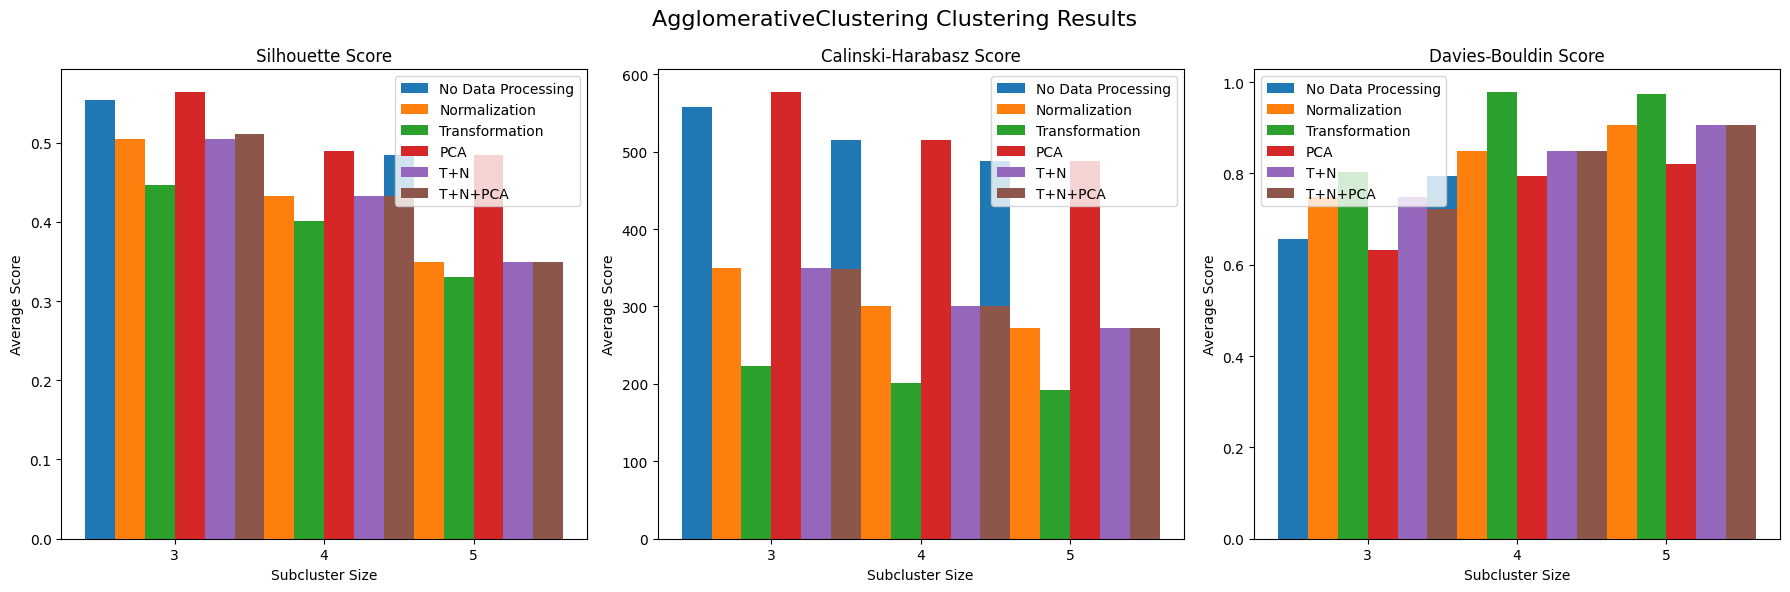

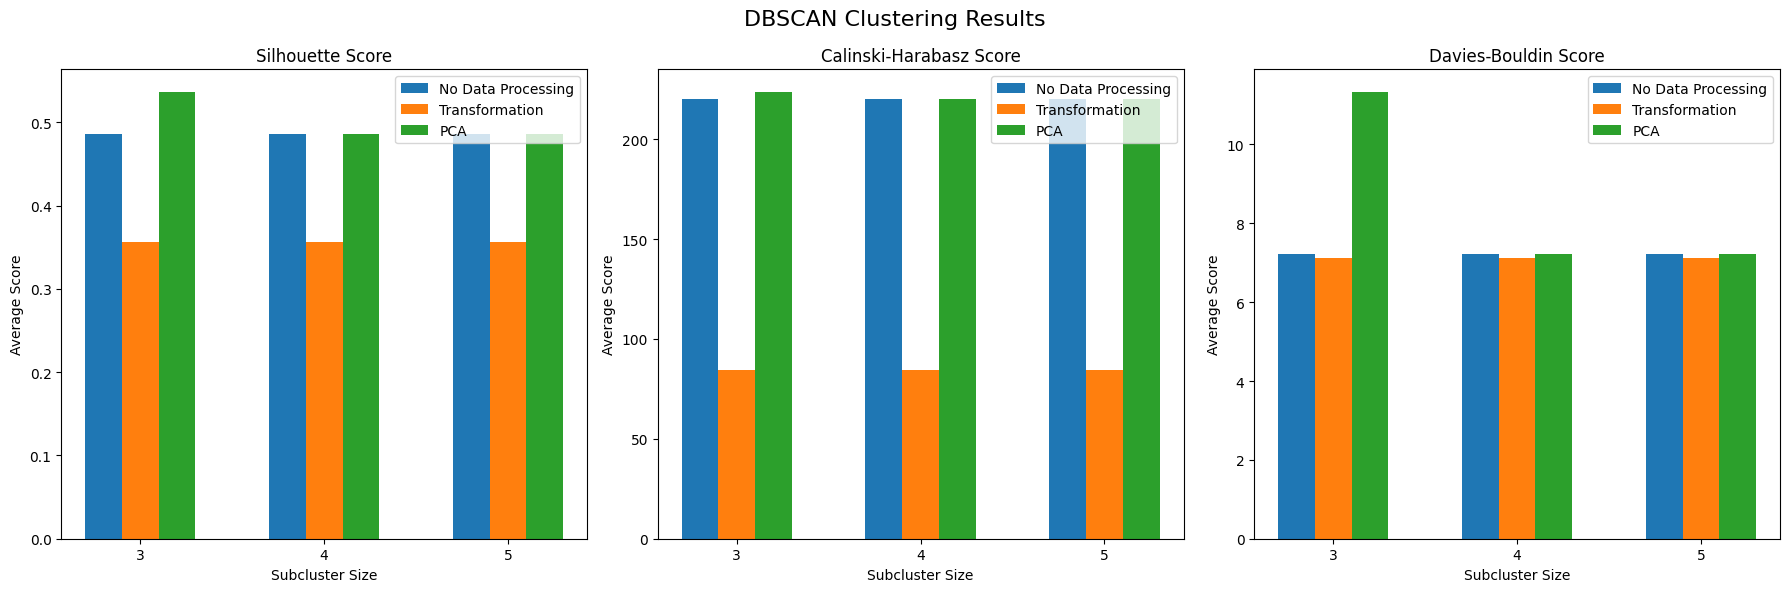

In [10]:
def plot_bar_results_per_algorithm(algorithm_name, df):
    # Get unique processing methods and subcluster sizes
    processing_methods = df['Processing Method'].unique()
    subcluster_sizes = df['Subcluster Size'].unique()

    # Create subplots for each metric
    fig, axs = plt.subplots(1, 3, figsize=(18, 6))

    # Plot bar graphs for each metric
    for i, metric in enumerate(['Silhouette Score', 'Calinski-Harabasz Score', 'Davies-Bouldin Score']):
        ax = axs[i]
        bar_width = 0.2
        for j, method in enumerate(processing_methods):
            scores = []
            for size in subcluster_sizes:
                size_df = df[(df['Processing Method'] == method) & (df['Subcluster Size'] == size)]
                scores.append(size_df[metric].mean())
            ax.bar(np.arange(len(subcluster_sizes)) + j * bar_width, scores, bar_width, label=method)

        ax.set_title(metric)
        ax.set_xlabel('Subcluster Size')
        ax.set_ylabel('Average Score')
        ax.set_xticks(np.arange(len(subcluster_sizes)) + bar_width * (len(processing_methods) - 1) / 2)
        ax.set_xticklabels(subcluster_sizes)
        ax.legend()

    # Set title for the entire plot
    plt.suptitle(f'{algorithm_name} Clustering Results', fontsize=16)
    plt.tight_layout()
    plt.show()

# Plot bar results for each algorithm
for algorithm_name, df in dfs.items():
    plot_bar_results_per_algorithm(algorithm_name, df)
